Projeto 3 - Tainara, Samara e Marco

Git Hub: www.github.com/tainarasm



In [52]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Lasso



In [29]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\taina\Ci-ncia-dos-Dados\Projeto Final


<IPython.core.display.Javascript object>


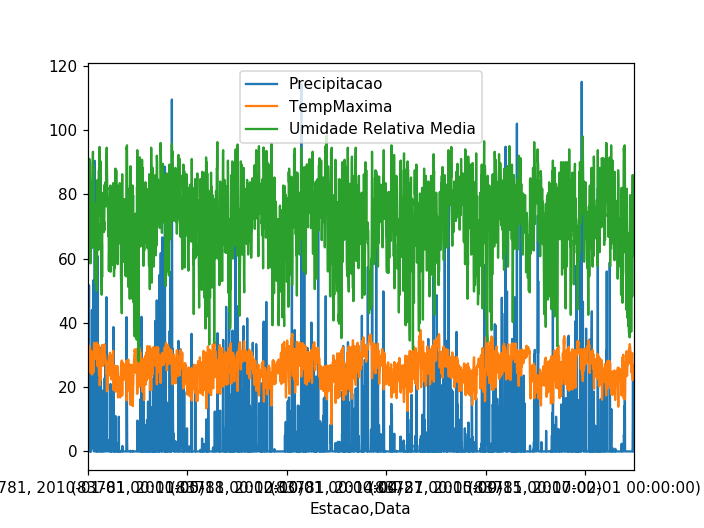

In [80]:
tempo = pd.read_excel('meteorologia.xlsx')

tempo = tempo.groupby(['Estacao','Data'])
tempo = tempo.last()
tempo = tempo.dropna()
#tempo.head()

chuva = tempo['Precipitacao'].plot()
plt.legend()
calor = tempo['TempMaxima'].plot()
plt.legend()
umidade = tempo['Umidade Relativa Media'].plot()
plt.legend()

In [4]:
train = pd.DataFrame({'Hora': tempo['Hora'][:1500],
                      'Precipitação': tempo['Precipitacao'][:1500],
                      'Temperatura Mínima': tempo['TempMinima'][:1500],
                      'Temperatura Máxima': tempo['TempMaxima'][:1500],
                      'Insolação': tempo['Insolacao'][:1500],
                      'Umidade Relativa Média': tempo['Umidade Relativa Media'][:1500],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][:1500]})

test = pd.DataFrame({ 'Hora': tempo['Hora'][1500:],
                      'Precipitação': tempo['Precipitacao'][1500:],
                      'Temperatura Mínima': tempo['TempMinima'][1500:],
                      'Temperatura Máxima': tempo['TempMaxima'][1500:],
                      'Insolação': tempo['Insolacao'][1500:],
                      'Umidade Relativa Média': tempo['Umidade Relativa Media'][1500:],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][1500:]})

In [5]:
#sm2.stats.diagnostic.acorr_ljungbox(train['Média de Temperatura do Dia Anterior'])
#(teste, p) = sm2.stats.diagnostic.acorr_ljungbox(train['Umidade Relativa Média Dia Anterior'])
#teste
#p

In [6]:
Y = train['Precipitação']
X = train[['Temperatura Mínima', 'Umidade Relativa Média']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Precipitação   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     84.21
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           2.21e-35
Time:                        18:28:44   Log-Likelihood:                -5777.6
No. Observations:                1500   AIC:                         1.156e+04
Df Residuals:                    1497   BIC:                         1.158e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -24.7859      2.394    -10.353      0.000     -29.482     -20.090
Temperatura Mínima         0.4949      0.088      5.622      0.000       0.322       0.668
Umidade Relativa Média     0.2943      0.025     11.949      0.000       0.246       0.343
==============================================================================
Omnibus:                     1188.013   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24798.382
Skew:                           3.621   Prob(JB):                         0.00
Kurtosis:                      21.556   Cond. No.                         617.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
X_teste = test[['Temperatura Mínima', 'Umidade Relativa Média']]
X_teste = sm.add_constant(X_teste)
Y_pred = results.predict(X_teste)

residuo = (test['Precipitação']-Y_pred)


residuo.hist(normed=True)
print(residuo.sum())

-722.3524217721572


In [8]:
log = []


for i in range(len(tempo['Precipitacao'])):
    if tempo['Precipitacao'][i]==0:
        log.append(tempo['Precipitacao'][i])
    else:
        log.append(np.log(tempo['Precipitacao'][i]))



X_temp_media_dia_anterior = []
media_umidade = []
            

for i in range(1,len(tempo['TempMaxima'])):
    X_temp_media_dia_anterior.append((tempo['TempMinima'][i]+tempo['TempMaxima'][i])/2)
    media_umidade.append((tempo['Umidade Relativa Media'][i]+tempo['Umidade Relativa Media'][i-1])/2)


train = pd.DataFrame({'Hora': tempo['Hora'][2:1500],
                      'Precipitação': tempo['Precipitacao'][2:1500],
                      'Log_Precipitacao': log[2:1500],
                      'Temperatura Mínima': tempo['TempMinima'][2:1500],
                      'Temperatura Máxima': tempo['TempMaxima'][2:1500],
                      'Temperatura Média do Dia Anterior': X_temp_media_dia_anterior[0:1498],
                      'Insolação': tempo['Insolacao'][2:1500],
                      'Umidade Relativa Média': tempo['Umidade Relativa Media'][2:1500],
                      'Média de Umidade de Dois Dias Anteriores': media_umidade[0:1498],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][2:1500]})

test = pd.DataFrame({ 'Hora': tempo['Hora'][1500:2745],
                      'Precipitação': tempo['Precipitacao'][1500:2745],
                      'Log_Precipitacao': log[1500:2745],
                      'Temperatura Mínima': tempo['TempMinima'][1500:2745],
                      'Temperatura Máxima': tempo['TempMaxima'][1500:2745],
                      'Temperatura Média do Dia Anterior': X_temp_media_dia_anterior[1498:2743],
                      'Insolação': tempo['Insolacao'][1500:2745],
                      'Umidade Relativa Média': tempo['Umidade Relativa Media'][1500:2745],
                      'Média de Umidade de Dois Dias Anteriores': media_umidade[1498:2743],
                      'Velocidade do Vento Média': tempo['Velocidade do Vento Media'][1500:2745]})
    

In [9]:
Y = train['Log_Precipitacao']


X = train[['Temperatura Média do Dia Anterior', 'Média de Umidade de Dois Dias Anteriores']]
X_teste = test[['Temperatura Média do Dia Anterior', 'Média de Umidade de Dois Dias Anteriores']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Log_Precipitacao   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           1.04e-50
Time:                        18:28:48   Log-Likelihood:                -2345.8
No. Observations:                1498   AIC:                             4698.
Df Residuals:                    1495   BIC:                             4714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7362      0.345    -13.722      0.000      -5.413      -4.059
Temperatura Média do Dia Anterior            0.1010      0.009     11.306      0.000       0.084       0.119
Média de Umidade de Dois Dias Anteriores     0.0437      0.003     14.419      0.000       0.038       0.050
==============================================================================
Omnibus:                      167.833   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.132
Skew:                           0.907   Prob(JB):                     1.30e-49
Kurtosis:                       3.560   Cond. No.                         885.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X_teste = sm.add_constant(X_teste)
Y_pred = results.predict(X_teste)


residuo = test['Precipitação']-np.exp(Y_pred)

residuo.hist(normed=True)

print(residuo.sum())

2718.681744430914


<IPython.core.display.Javascript object>


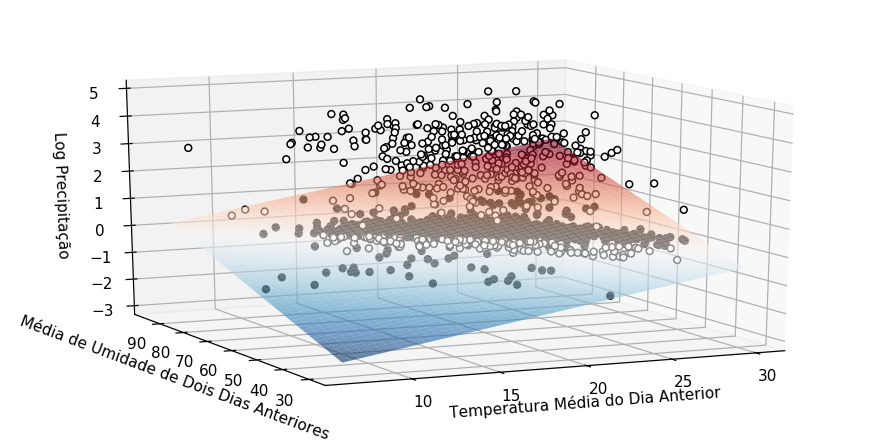

In [81]:
from mpl_toolkits.mplot3d import Axes3D


xx1, xx2 = np.meshgrid(np.linspace(X['Temperatura Média do Dia Anterior'].min(), X['Temperatura Média do Dia Anterior'].max(), 100), 
                       np.linspace(X['Média de Umidade de Dois Dias Anteriores'].min(), X['Média de Umidade de Dois Dias Anteriores'].max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = results.params[0] + results.params[1] * xx1 + results.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(8, 4))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = Y - results.predict(X)
ax.scatter(X[resid >= 0]['Temperatura Média do Dia Anterior'], X[resid >= 0]['Média de Umidade de Dois Dias Anteriores'], Y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0]['Temperatura Média do Dia Anterior'], X[resid < 0]['Média de Umidade de Dois Dias Anteriores'], Y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Temperatura Média do Dia Anterior')
ax.set_ylabel('Média de Umidade de Dois Dias Anteriores')
ax.set_zlabel('Log Precipitação')

In [63]:
#Testando a técnica de regressão Ridge

reg = linear_model.Ridge (alpha = 0.5)
reg.fit(X,Y) 

previsao = reg.predict(X_teste)
#sklearn.metrics.mean_squared_error(test['Precipitação'], previsao)  
#reg.coef_
#reg.intercept_ 

print("R²: {0}" .format(reg.score(X, Y)))
residuo = test['Precipitação']-np.exp(previsao)

print("Resíduo: {0}" .format(residuo.sum()))

R²: 0.14269530043608158
Resíduo: 2718.6880320421287


In [70]:
lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X,Y)

pred = lassoReg.predict(X_teste)


print("R²: {0}" .format(lassoReg.score(X, Y)))
residuo = test['Precipitação']-np.exp(pred)

print("Resíduo: {0}" .format(residuo.sum()))


R²: 0.0
Resíduo: 2869.0909581273436
